In [1]:
# Import necessary libraries
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# 1. Introduction to CIFAR-10 Dataset

In [3]:
# Load and describe the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 2. Data Preprocessing

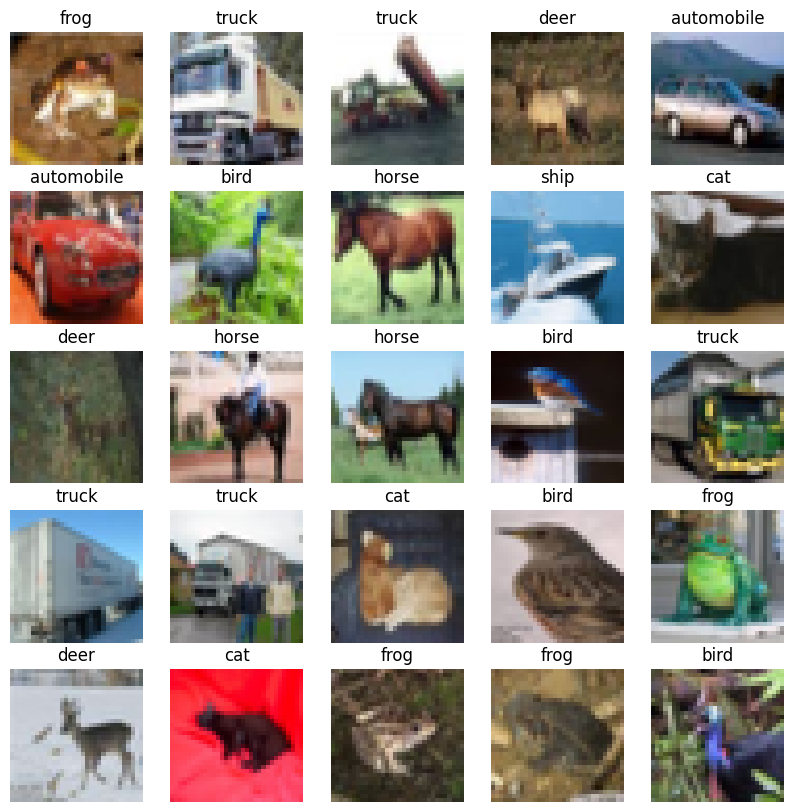

In [4]:
# Visualize and display images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [5]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 3. Building the Neural Network

In [7]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 4. Compiling the Model

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# 5. Training the Model

In [16]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=300,
                    verbose=True,
                    validation_split=0.1)

Epoch 1/300
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5593 - loss: 1.2598 - val_accuracy: 0.4804 - val_loss: 1.4604
Epoch 2/300
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.5642 - loss: 1.2555 - val_accuracy: 0.4858 - val_loss: 1.4604
Epoch 3/300
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5648 - loss: 1.2417 - val_accuracy: 0.5062 - val_loss: 1.4009
Epoch 4/300
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.5669 - loss: 1.2391 - val_accuracy: 0.4798 - val_loss: 1.4446
Epoch 5/300
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5731 - loss: 1.2305 - val_accuracy: 0.4924 - val_loss: 1.4777
Epoch 6/300
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.5757 - loss: 1.2182 - val_accuracy: 0.5282 - val_loss: 1.3576
Epoch 7/300
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5811 - loss: 1.2064 - val_accuracy: 0.5208 - val_loss: 1.3607
Epoch 8/300
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5795 - loss: 1.205

# 6. Evaluating the Model

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=False)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

Test Loss: 2.497560501098633, Test Accuracy: 0.5414999723434448


# 7. Visualization of Training Progress

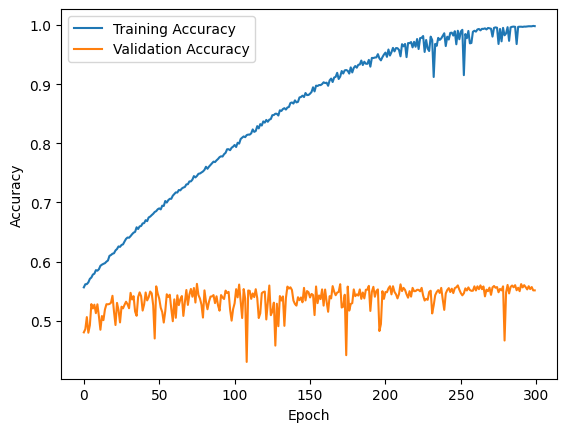

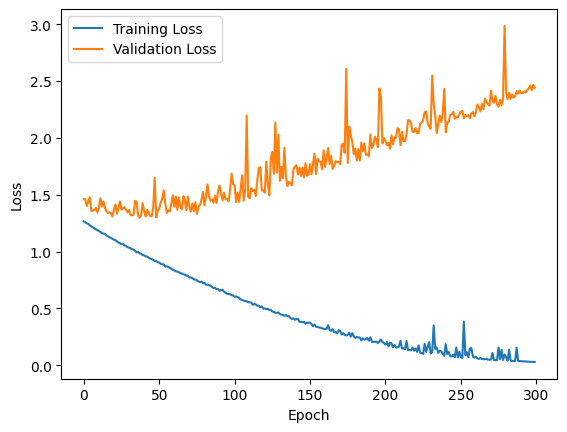

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 8. Making Predictions

In [19]:
predictions = model.predict(x_test[:10])
print('Predictions:', predictions.argmax(axis=1))
print('True labels:', y_test[:10].argmax(axis=1))

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predictions: [3 8 0 8 6 6 1 2 3 1]
True labels: [3 8 8 0 6 6 1 6 3 1]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


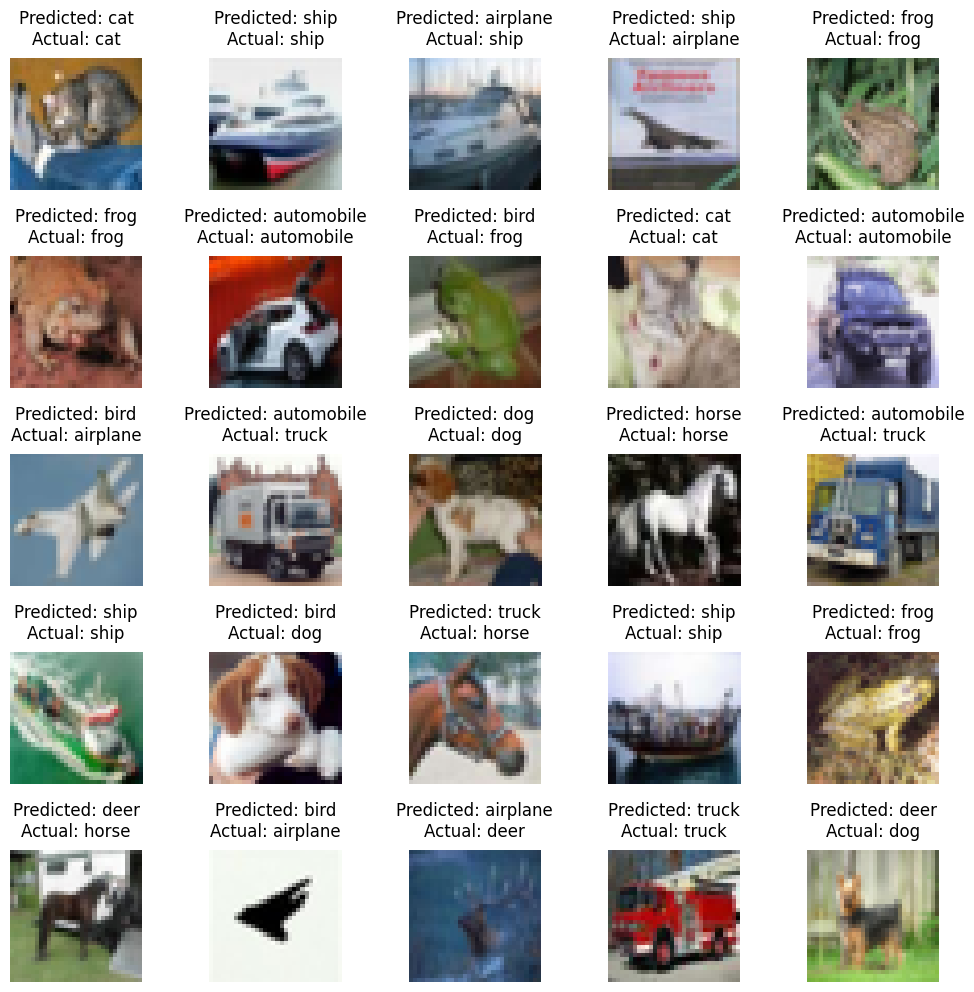

In [20]:
# Visualize some predictions
plt.figure(figsize=(12, 12))  # Adjust the figure size for better spacing

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {class_names[predicted_labels[i]]}\nActual: {class_names[np.argmax(y_test[i])]}', pad=10)  # Add padding to the title
    plt.axis('off')

plt.show()


# 9. Conclusion


# Key Learnings:

Data Preprocessing: Understanding the importance of preprocessing techniques like normalization and one-hot encoding to prepare data for training.

Neural Network Construction: Learning to build neural network architectures using Keras, including the Sequential model and various layers like Dense and Flatten.

Model Compilation and Training: Familiarity with compiling the model by specifying loss functions, optimizers, and metrics, and training the model using training data.

Model Evaluation: Evaluating model performance using test datasets and interpreting metrics like loss and accuracy.

Visualization of Training Progress: Visualizing training and validation metrics to monitor model performance and identify potential issues like overfitting or underfitting.

Making Predictions: Using trained models to make predictions on new data and assessing their accuracy.
    
# Potential Improvements and Real-world Applicability:

Architecture Optimization: Experiment with different neural network architectures, including deeper networks or convolutional neural networks (CNNs), to potentially improve performance.

Hyperparameter Tuning: Fine-tuning hyperparameters such as learning rate, batch size, and number of epochs can further enhance model performance.

Data Augmentation: Augmenting the dataset with transformations like rotation, scaling, or flipping can increase dataset diversity and improve model generalization.

Transfer Learning: Utilizing pre-trained models (e.g., pre-trained CNNs like VGG, ResNet) and fine-tuning them on the CIFAR-10 dataset can lead to better performance, especially with limited computational resources.

Ensemble Learning: Combining predictions from multiple models (ensemble learning) can often lead to improved accuracy and robustness.

Real-world Deployment: Deploying the trained model in real-world applications such as image recognition systems, object detection, or autonomous vehicles can provide valuable insights and practical experience in deploying deep learning models.